In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
with open(r"C:\Users\ply58\OneDrive\Tài liệu\PythonML\Github Repositories\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\Ames_Housing_Feature_Description.txt", 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [44]:
df = pd.read_csv(r"C:\Users\ply58\OneDrive\Tài liệu\PythonML\Github Repositories\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\Ames_outliers_removed.csv")

In [45]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [46]:
df = df.drop("PID", axis=1)

In [47]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [48]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
    return percent_nan

In [49]:
percent = percent_missing(df)

In [50]:
percent

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
BsmtFin SF 1       0.034165
Garage Cars        0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Pool QC'),
  Text(1, 0, 'Misc Feature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Mas Vnr Type'),
  Text(5, 0, 'Fireplace Qu'),
  Text(6, 0, 'Lot Frontage'),
  Text(7, 0, 'Garage Cond'),
  Text(8, 0, 'Garage Qual'),
  Text(9, 0, 'Garage Finish'),
  Text(10, 0, 'Garage Yr Blt'),
  Text(11, 0, 'Garage Type'),
  Text(12, 0, 'Bsmt Exposure'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Cond'),
  Text(15, 0, 'Bsmt Qual'),
  Text(16, 0, 'BsmtFin Type 1'),
  Text(17, 0, 'Mas Vnr Area'),
  Text(18, 0, 'Bsmt Half Bath'),
  Text(19, 0, 'Bsmt Full Bath'),
  Text(20, 0, 'BsmtFin SF 1'),
  Text(21, 0, 'Garage Cars'),
  Text(22, 0, 'Garage Area'),
  Text(23, 0, 'Total Bsmt SF'),
  Text(24, 0, 'Bsmt Unf SF'),
  Text(25, 0, 'BsmtFin SF 2'),
  Text(26, 0, 'Electrical')])

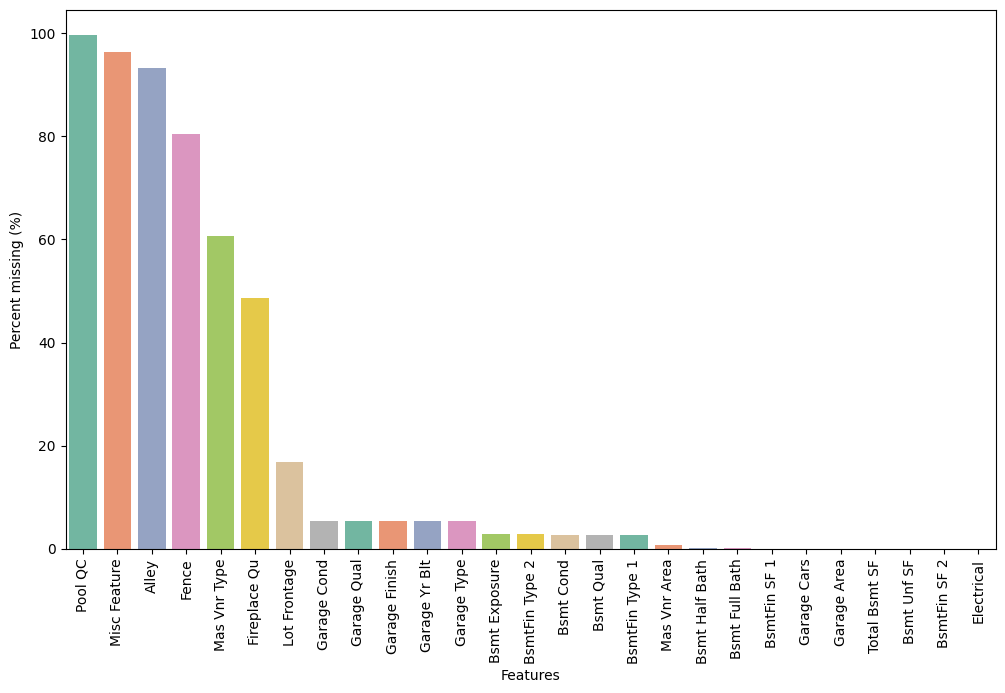

In [51]:
plt.figure(figsize=(12, 7))
sns.barplot(x=percent.index, y=percent, hue=percent.index, palette='Set2')
plt.xlabel("Features")
plt.ylabel("Percent missing (%)")
plt.xticks(rotation=90)

(0.0, 1.0)

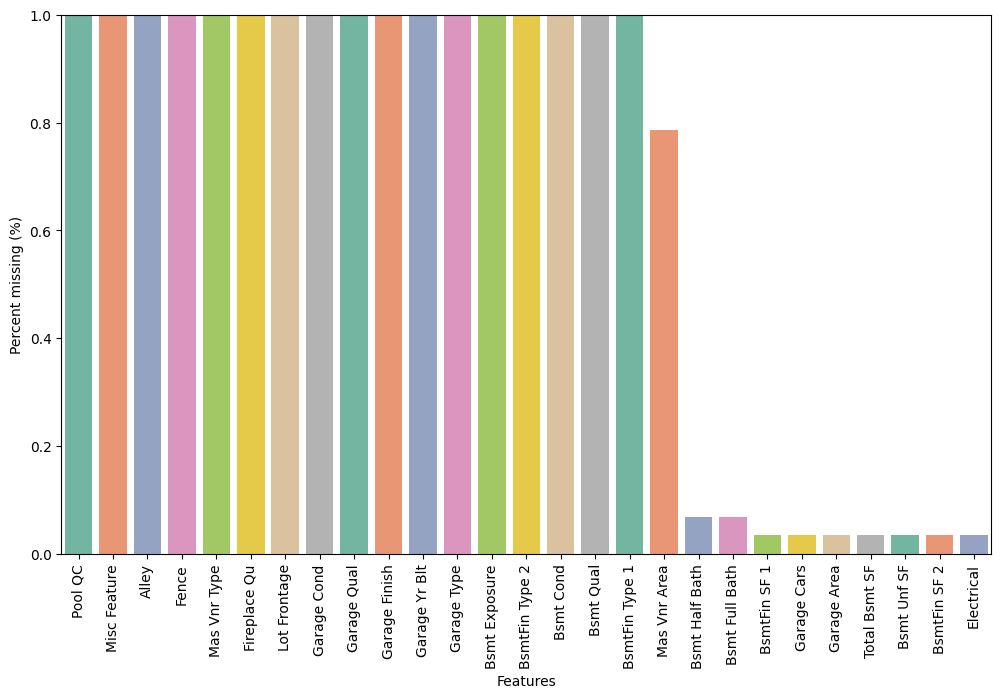

In [52]:
plt.figure(figsize=(12, 7))
sns.barplot(x=percent.index, y=percent, hue=percent.index, palette='Set2')
plt.xlabel("Features")
plt.ylabel("Percent missing (%)")
plt.xticks(rotation=90)
plt.ylim(0, 1)

In [53]:
percent[percent < 1]

Mas Vnr Area      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
BsmtFin SF 1      0.034165
Garage Cars       0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
dtype: float64

In [54]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [55]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Cars', 'Garage Area'])

In [56]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [57]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


#### BSMT numeric columns --> fillna 0

In [58]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

#### BSMT string columns --> fillna 'None'

In [59]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

#### Mas Vnr

In [63]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [64]:
percent_nan = percent_missing(df)

Text(0, 0.5, 'Percent missing (%)')

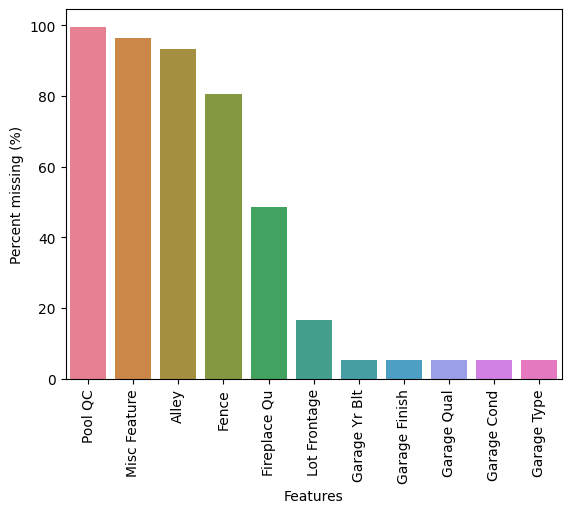

In [65]:
sns.barplot(x=percent_nan.index,y=percent_nan, hue=percent_nan.index)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Percent missing (%)")
# plt.ylim(0, 1)

#### Garage Features

In [66]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [67]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [68]:
percent_nan = percent_missing(df)

Text(0, 0.5, 'Percent missing (%)')

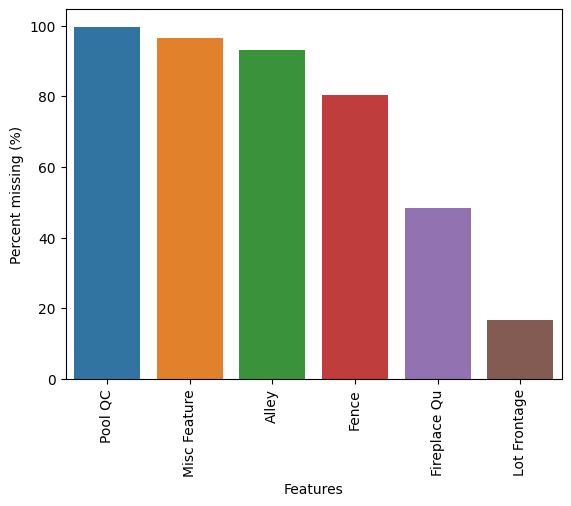

In [69]:
sns.barplot(x=percent_nan.index,y=percent_nan, hue=percent_nan.index)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Percent missing (%)")

## Dropping cols

In [70]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [71]:
percent_nan = percent_missing(df)

Text(0, 0.5, 'Percent missing (%)')

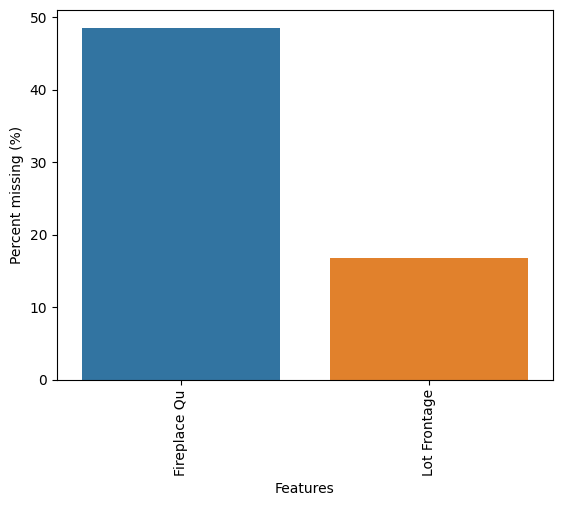

In [72]:
sns.barplot(x=percent_nan.index,y=percent_nan, hue=percent_nan.index)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Percent missing (%)")

Filling 'None' based on Description text 

In [73]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

The Last feature

In [74]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

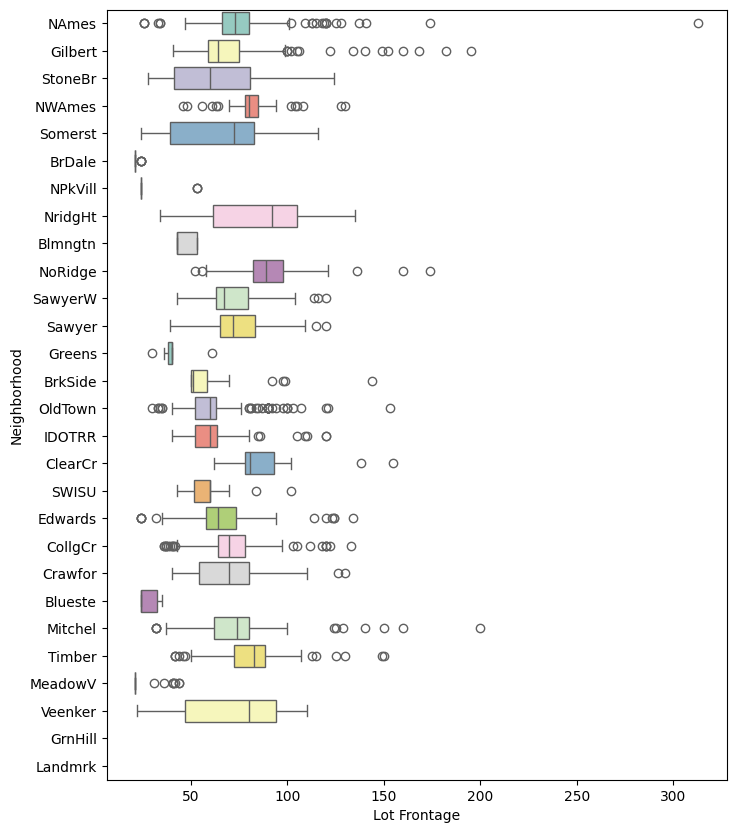

In [77]:
plt.figure(figsize=(8, 10))
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h', hue='Neighborhood', palette='Set3')

In [81]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

In [82]:
percent_nan = percent_missing(df)

Text(0, 0.5, 'Percent missing (%)')

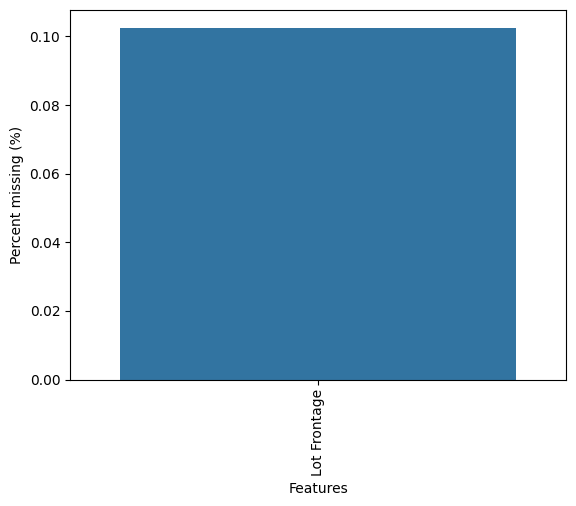

In [83]:
sns.barplot(x=percent_nan.index,y=percent_nan, hue=percent_nan.index)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Percent missing (%)")

In [85]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)